Initial column names: Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')


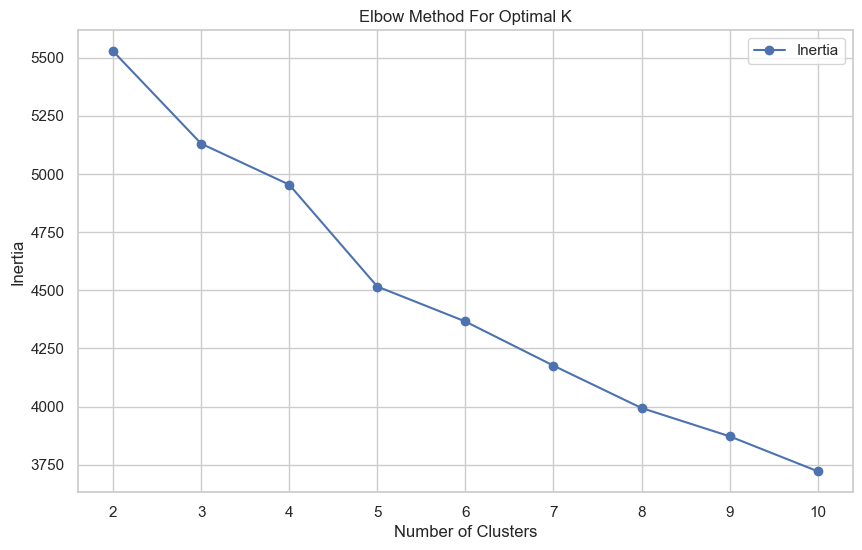

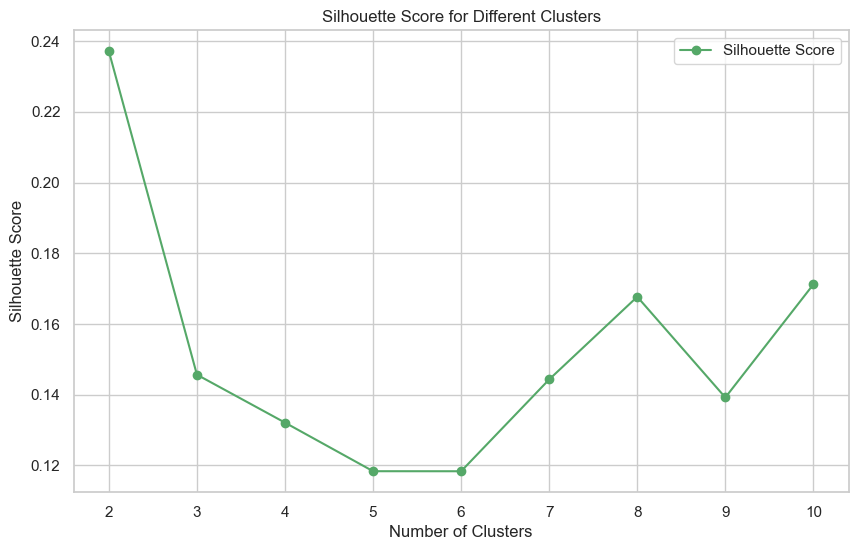

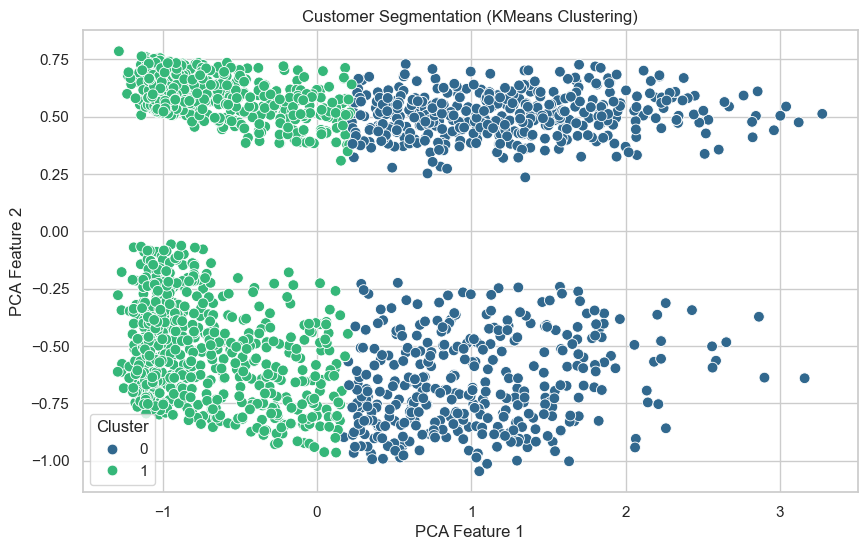


Cluster Summary Statistics:
           Income   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
Cluster                                                                
0        0.620728  0.040793  0.209207  0.502225  0.413752   0.287674   
1        0.333802  0.335932  0.281366  0.490465  0.072140   0.033952   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
Cluster                                                                     
0               0.210204         0.315815          0.225969      0.241244   
1               0.022982         0.037469          0.025561      0.071008   

         ...  education_2n Cycle  education_Basic  education_Graduation  \
Cluster  ...                                                              
0        ...            0.085082         0.002331              0.537296   
1        ...            0.092799         0.038604              0.484039   

         education_Master  education_PhD  MntTotal  MntRegularProds  \
C

In [12]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Set the plotting style
sns.set(style='whitegrid')

# Load the dataset
file_path = "C:\\Users\\SACHIN KUMAR\\OneDrive\\Desktop\\data analytics\\ifood_df.csv"
df = pd.read_csv(file_path)

# Display column names
print("Initial column names:", df.columns)

# Step 1: Data Preprocessing
# Handle missing values by filling them with median values for numeric columns
df = df.fillna(df.median(numeric_only=True))

# Drop 'DtCustomer' column if it exists
if 'DtCustomer' in df.columns:
    df = df.drop(columns=['DtCustomer'])

# Encode categorical variables
if 'Education' in df.columns and 'Marital' in df.columns:
    df = pd.get_dummies(df, columns=['Education', 'Marital'], drop_first=True)

# Normalize numerical features
numeric_features = df.select_dtypes(include=[np.number]).columns
scaler = MinMaxScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Step 2: Feature Engineering
# Create some additional features, such as total spend and average purchase frequency
df['TotalMnt'] = df[['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds']].sum(axis=1)
df['TotalPurchases'] = df[['NumDealsPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases']].sum(axis=1)

# Step 3: Dimensionality Reduction (PCA)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df.drop(['Response'], axis=1, errors='ignore'))

# Step 4: Elbow Method and Silhouette Score for Optimal Clustering
inertia = []
silhouette_scores = []
range_clusters = range(2, 11) # Start from 2 clusters

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df.drop(['Response'], axis=1, errors='ignore'))
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df.drop(['Response'], axis=1, errors='ignore'), cluster_labels))

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range_clusters, inertia, 'bo-', label='Inertia')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.legend()
plt.show()

# Plot the Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(range_clusters, silhouette_scores, 'go-', label='Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Clusters')
plt.legend()
plt.show()

# Step 5: Optimal KMeans Clustering
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2  # Adjust for range starting at 2
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df.drop(['Response'], axis=1, errors='ignore'))

# Step 6: Visualize Clusters using PCA-reduced data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=df['Cluster'], palette='viridis', s=60)
plt.title('Customer Segmentation (KMeans Clustering)')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend(title='Cluster')
plt.show()

# Step 7: Cluster Analysis
cluster_summary = df.groupby('Cluster').mean()
print("\nCluster Summary Statistics:")
print(cluster_summary)

# Save the clustered data to a new CSV file
output_path = "C:\\Users\\SACHIN KUMAR\\OneDrive\\Desktop\\data analytics\\customer_segmentation_result.csv"
df.to_csv(output_path, index=False)
print(f"\nClustered data has been saved to {output_path}")
